In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
dataset.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [3]:
X[0:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

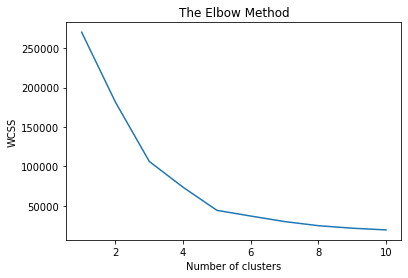

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

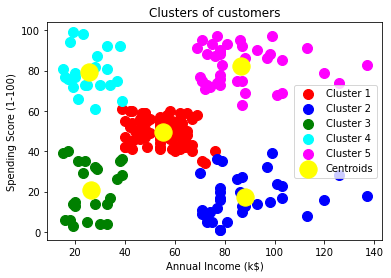

In [6]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [7]:
data = pd.read_csv('iris.data',header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(data.iloc[:, [0, 1, 2, 3]].values)

KMeans(n_clusters=3, n_init=15)

In [9]:
from sklearn.metrics.pairwise import pairwise_distances_argmin
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(data.iloc[:, [0, 1, 2, 3]].values,
                                k_means_cluster_centers)

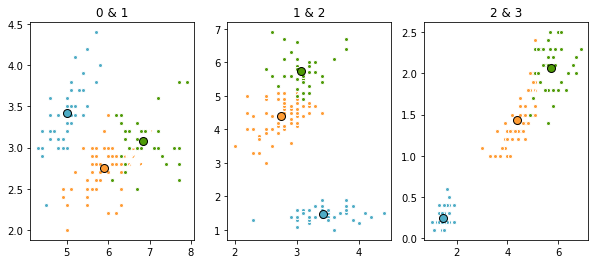

In [10]:
f, ax = plt.subplots(1, 3, figsize=(10,4))
colors = ['#4EACC5', '#FF9C34', '#4E9A06']
#print(ax)
for i in range(3):
    # i - кластер
    my_members = k_means_labels == i
    cluster_center = k_means_cluster_centers[i]
    for j in range(3):
        ax[j].plot(data.iloc[:, [0, 1, 2, 3]].values[my_members, j],
            data.iloc[:, [0, 1, 2, 3]].values[my_members, j+1], 'w',
            markerfacecolor=colors[i], marker='o', markersize=4)
        # center point
        ax[j].plot(cluster_center[j], cluster_center[j+1], 'o',
            markerfacecolor=colors[i],
            markeredgecolor='k', markersize=8)
        ax[j].set_title(str(j) + ' & ' + str(j+1))
plt.show()

In [11]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
#k_means.fit(data.iloc[:, [0, 1, 2, 3]].values)
X = data.iloc[:, [0, 1, 2, 3]].values
y_kmeans = kmeans.fit_predict(data.iloc[:, [0, 1, 2, 3]].values)

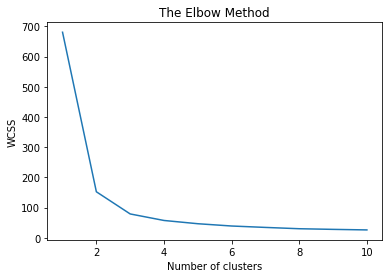

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=15)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

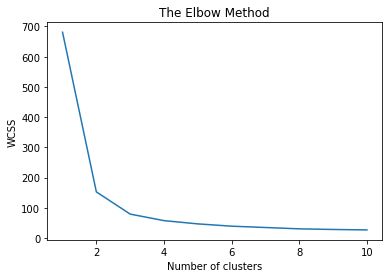

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
data['prediction'] = k_means.fit_predict(data.iloc[:, [0, 1, 2, 3]].values)
data['prediction_2'] = k_means.fit(data.iloc[:, [0, 1, 2, 3]].values).predict(data.iloc[:, [0, 1, 2, 3]].values)
data

,0,1,2,3,4,prediction,prediction_2
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1,1
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [15]:
data.groupby([4,'prediction']).agg({0:'count'})

0
4               prediction    
Iris-setosa     0           50
Iris-versicolor 1           48
                2            2
Iris-virginica  1           14
                2           36

In [16]:
data.groupby([4,'prediction_2']).agg({0:'count'})

0
4               prediction_2    
Iris-setosa     0             50
Iris-versicolor 1             48
                2              2
Iris-virginica  1             14
                2             36